In [2]:
import numpy as np
import pygrib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
from scipy.constants import convert_temperature
import pytz
from datetime import datetime
from metpy import calc
from metpy.units import units
import matplotlib as mpl
mpl.rc("savefig", dpi=300)

In [3]:
df = pd.read_csv('./extracted/East_lansing/temp_2001-2018_9km.csv')
Temp = convert_temperature(df.Temp, 'Kelvin', 'Fahrenheit')
temp = convert_temperature(df.Temp, 'Kelvin', 'Celsius')
df = pd.read_csv('./extracted/East_lansing/prcp_2001-2018_9km.csv')
prcp0 = df.Prcp * 39.3701
df = pd.read_csv('./extracted/East_lansing/dew_2001-2018_9km.csv')
dew = convert_temperature(df.Dewpoint, 'Kelvin', 'Celsius')
df = pd.read_csv('./extracted/East_lansing/U_2001-2018_9km.csv')
u = df.U * 2.23694
df = pd.read_csv('./extracted/East_lansing/V_2001-2018_9km.csv')
v = df.V * 2.23694  
df = pd.read_csv('./extracted/East_lansing/solar_2001-2018_9km.csv')
solar0 = df.Solar / 41840.0 

In [4]:
prcp = 0 * prcp0
solar = 0 * solar0
for i in range(6574-1):
    prcp[23+i*24] = prcp0[23+i*24]
    solar[23+i*24] = solar0[23+i*24]
prcp[157774] = prcp0[157774]
solar[157774] = solar[157774]

In [5]:
rh = np.array([calc.relative_humidity_from_dewpoint(units.Quantity(temp, 'celsius'), units.Quantity(dew, 'celsius'))])[0,:]
wind = np.sqrt(u**2 + v**2)

In [6]:
eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='1/1/2001', end='1/1/2019', freq='H')[1:-1].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
hour = dff.strftime('%-H')

In [7]:
out = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day, 'HOUR':hour, 'atmp':Temp, 'pcpn':prcp, 'relh':rh*100, 'srad':solar, 'wspd':wind})
out = out.drop(out.index[0:5])
out = out.astype(float)
out

,YEAR,MONTH,DAY,HOUR,atmp,pcpn,relh,srad,wspd
5,2001.0,1.0,1.0,1.0,8.497075,0.00000,85.807687,0.0,4.532454
6,2001.0,1.0,1.0,2.0,8.589634,0.00000,85.283309,0.0,4.617539
7,2001.0,1.0,1.0,3.0,6.564470,0.00000,86.271901,0.0,4.740084
8,2001.0,1.0,1.0,4.0,4.932643,0.00000,86.877533,0.0,4.641265
9,2001.0,1.0,1.0,5.0,3.351106,0.00000,87.266252,0.0,4.535187
...,...,...,...,...,...,...,...,...,...
157770,2018.0,12.0,31.0,14.0,36.390757,0.00000,93.771703,0.0,6.890687
157771,2018.0,12.0,31.0,15.0,37.016731,0.00000,94.434646,0.0,7.335318
157772,2018.0,12.0,31.0,16.0,37.475300,0.00000,94.937376,0.0,6.099769
157773,2018.0,12.0,31.0,17.0,37.506996,0.00000,95.926998,0.0,5.440496


In [8]:
# df1 = pd.read_csv('./observation/East Lansing Hourly.csv')
df1 = pd.read_csv('./observation/East Lansing 5 min.csv')
df1 = df1.drop(df1.index[157770:])
df1 = df1.astype(float)
df1 = pd.DataFrame({'YEAR':df1.year, 'MONTH':df1.month, 'DAY':df1.day, 'HOUR':df1.hour, 'atmp':df1.atmp, 'pcpn':df1.pcpn, 'relh':df1.relh, 'wspd':df1.wspd2000})
df1

,YEAR,MONTH,DAY,HOUR,atmp,pcpn,relh,wspd
0,2001.0,1.0,1.0,1.0,9.2,0.00,95.6,0.5
1,2001.0,1.0,1.0,2.0,8.8,0.00,96.3,0.4
2,2001.0,1.0,1.0,3.0,13.7,0.00,94.2,4.7
3,2001.0,1.0,1.0,4.0,15.0,0.00,90.3,0.8
4,2001.0,1.0,1.0,5.0,12.0,0.00,93.3,0.4
...,...,...,...,...,...,...,...,...
157765,2018.0,12.0,31.0,14.0,35.9,0.01,97.6,4.5
157766,2018.0,12.0,31.0,15.0,36.7,0.02,98.0,6.4
157767,2018.0,12.0,31.0,16.0,37.7,0.00,98.1,6.7
157768,2018.0,12.0,31.0,17.0,38.5,0.00,98.0,6.1


In [12]:
era_temp_season = np.array(out.groupby([out.YEAR,out.MONTH])['atmp'].mean()).reshape(-1,3).mean(axis=1)
obs_temp_season = np.array(df1.groupby([df1.YEAR,df1.MONTH])['atmp'].mean()).reshape(-1,3).mean(axis=1)
era_prcp_season = np.array(out.groupby([out.YEAR,out.MONTH])['pcpn'].mean()).reshape(-1,3).sum(axis=1)
obs_prcp_season = np.array(df1.groupby([df1.YEAR,df1.MONTH])['pcpn'].mean()).reshape(-1,3).sum(axis=1)
era_wind_season = np.array(out.groupby([out.YEAR,out.MONTH])['wspd'].mean()).reshape(-1,3).mean(axis=1)
obs_wind_season = np.array(df1.groupby([df1.YEAR,df1.MONTH])['wspd'].mean()).reshape(-1,3).mean(axis=1)
# era_solar_season = np.array(out.groupby([out.YEAR,out.MONTH])['srad'].mean()).reshape(-1,3).mean(axis=1)
# obs_solar_season = np.array(df1.groupby([df1.YEAR,df1.MONTH])['srad'].mean()).reshape(-1,3).mean(axis=1)
era_rh_season = np.array(out.groupby([out.YEAR,out.MONTH])['relh'].mean()).reshape(-1,3).mean(axis=1)
obs_rh_season = np.array(df1.groupby([df1.YEAR,df1.MONTH])['relh'].mean()).reshape(-1,3).mean(axis=1)

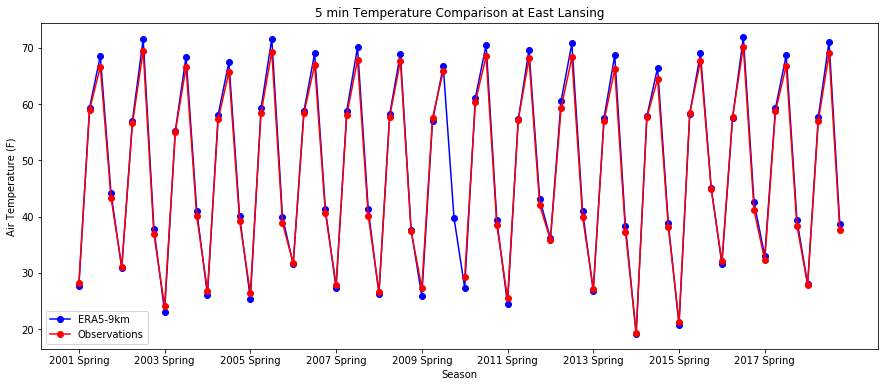

In [10]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,73)), era_temp_season, 'b-o')
plt.plot(list(range(1,73)), obs_temp_season, 'r-o')
plt.xticks(np.arange(1, 72, step=8),['{0} Spring'.format(2*i+2001) for i in range(18)])
plt.xlabel('Season')
plt.ylabel('Air Temperature (F)')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('5 min Temperature Comparison at East Lansing')
plt.savefig('./plot/ERA5-9km-temp_season_5min.png')

In [14]:
era_prcp_warm = []
i = 1
while i<len(era_prcp_season):
    era_prcp_warm.append(era_prcp_season[i])
    era_prcp_warm.append(era_prcp_season[i+1])
    i = i + 4
era_prcp_warm = np.array(era_prcp_warm)  

obs_prcp_warm = []
i = 1
while i<len(obs_prcp_season):
    obs_prcp_warm.append(obs_prcp_season[i])
    obs_prcp_warm.append(obs_prcp_season[i+1])
    i = i + 4
obs_prcp_warm = np.array(obs_prcp_warm) 

plt.figure(figsize=(15,6))
plt.plot(list(range(1,37)), era_prcp_warm, 'b-o')
plt.plot(list(range(1,37)), obs_prcp_warm, 'r-o')
plt.xticks(np.arange(1, 37, step=8),['{0} Warm Season'.format(4*i+2001) for i in range(18)])
plt.xlabel('Warm Season')
plt.ylabel('Precipitation (inches) ')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('5 min Precipitation Comparison at East Lansing')
# plt.savefig('./plot/ERA5-9km-prcp_warmseason.png')

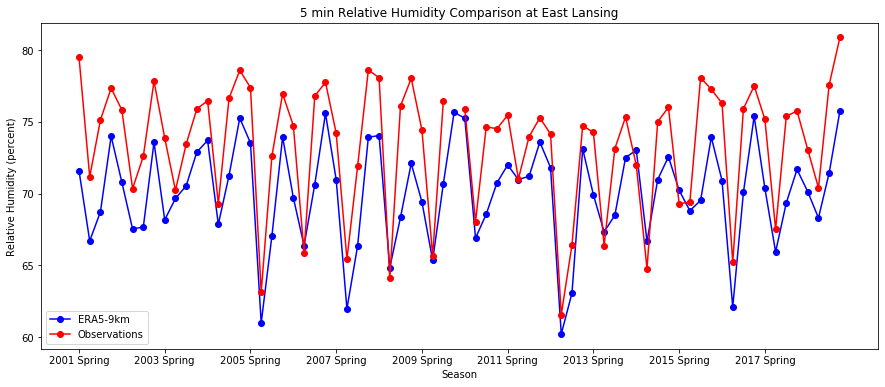

In [15]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,73)), era_rh_season, 'b-o')
plt.plot(list(range(1,73)), obs_rh_season, 'r-o')
plt.xticks(np.arange(1, 72, step=8),['{0} Spring'.format(2*i+2001) for i in range(18)])
plt.xlabel('Season')
plt.ylabel('Relative Humidity (percent)')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('5 min Relative Humidity Comparison at East Lansing')
plt.savefig('./plot/ERA5-9km-rh_season_5min.png')

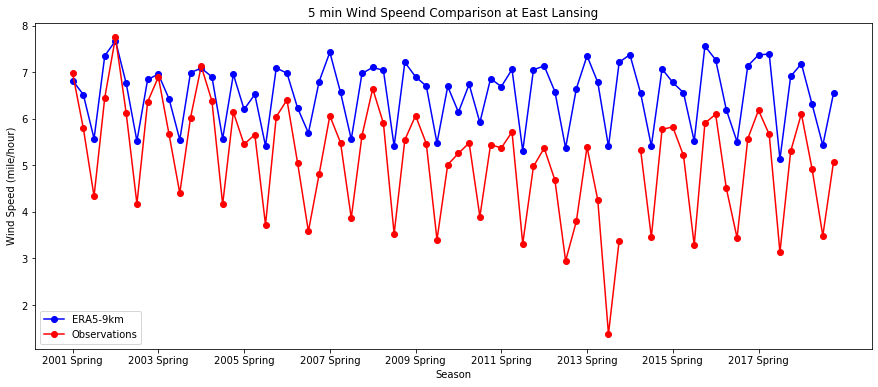

In [16]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,73)), era_wind_season, 'b-o')
plt.plot(list(range(1,73)), obs_wind_season, 'r-o')
plt.xticks(np.arange(1, 72, step=8),['{0} Spring'.format(2*i+2001) for i in range(18)])
plt.xlabel('Season')
plt.ylabel('Wind Speed (mile/hour)')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('5 min Wind Speend Comparison at East Lansing')
plt.savefig('./plot/ERA5-9km-wind_season_5min.png')

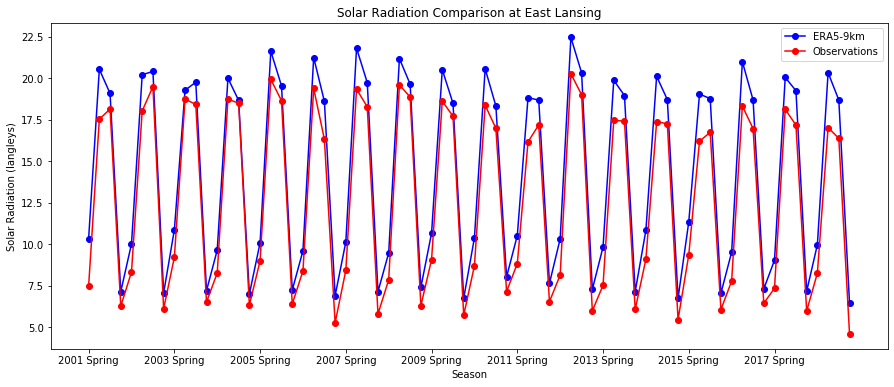

In [82]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,73)), era_solar_season, 'b-o')
plt.plot(list(range(1,73)), obs_solar_season, 'r-o')
plt.xticks(np.arange(1, 72, step=8),['{0} Spring'.format(2*i+2001) for i in range(18)])
plt.xlabel('Season')
plt.ylabel('Solar Radiation (langleys)')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('Solar Radiation Comparison at East Lansing')
plt.savefig('./plot/ERA5-9km-solar_season.png')

In [83]:
df = pd.read_csv('./extracted/East_lansing/temp_2001-2018_30km.csv')
Temp = convert_temperature(df.Temp, 'Kelvin', 'Fahrenheit')
temp = convert_temperature(df.Temp, 'Kelvin', 'Celsius')
df = pd.read_csv('./extracted/East_lansing/prcp_2001-2018_30km.csv')
prcp = df.Prcp * 39.3701
df = pd.read_csv('./extracted/East_lansing/dew_2001-2018_30km.csv')
dew = convert_temperature(df.Dewpoint, 'Kelvin', 'Celsius')
df = pd.read_csv('./extracted/East_lansing/U_2001-2018_30km.csv')
u = df.U * 2.23694
df = pd.read_csv('./extracted/East_lansing/V_2001-2018_30km.csv')
v = df.V * 2.23694  
df = pd.read_csv('./extracted/East_lansing/solar_2001-2018_30km.csv')
solar = df.Solar / 41840.0 

In [84]:
rh = np.array([calc.relative_humidity_from_dewpoint(units.Quantity(temp, 'celsius'), units.Quantity(dew, 'celsius'))])[0,:]
wind = np.sqrt(u**2 + v**2)

In [85]:
eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='1/1/2001', end='1/1/2019', freq='H')[:-1].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
hour = dff.strftime('%-H')

In [86]:
out = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day, 'HOUR':hour, 'atmp':Temp, 'pcpn':prcp, 'relh':rh*100, 'srad':solar, 'wspd':wind})
# out.to_csv('./extracted/East_Lansing_30km.csv')

In [94]:
out = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day, 'HOUR':hour, 'atmp':Temp, 'pcpn':prcp, 'relh':rh*100, 'srad':solar, 'wspd':wind})
out = out.drop(out.index[0:6])
out = out.astype(float)
out

,YEAR,MONTH,DAY,HOUR,atmp,pcpn,relh,srad,wspd
6,2001.0,1.0,1.0,1.0,10.185673,0.000019,84.288795,0.000000,4.870395
7,2001.0,1.0,1.0,2.0,9.042820,0.000000,84.885489,0.000000,5.111853
8,2001.0,1.0,1.0,3.0,7.669227,0.000000,84.871324,0.000000,5.153842
9,2001.0,1.0,1.0,4.0,6.591853,0.000000,85.273245,0.000000,4.860731
10,2001.0,1.0,1.0,5.0,8.296052,0.000000,87.021416,0.000000,4.306955
...,...,...,...,...,...,...,...,...,...
157771,2018.0,12.0,31.0,14.0,36.849272,0.096381,91.463756,1.734608,9.233703
157772,2018.0,12.0,31.0,15.0,37.480986,0.126756,93.241211,1.439388,9.799266
157773,2018.0,12.0,31.0,16.0,37.468516,0.139184,95.454883,0.910134,8.496033
157774,2018.0,12.0,31.0,17.0,38.050929,0.104641,95.023354,0.289101,7.773046


In [95]:
era_temp_season = np.array(out.groupby([out.YEAR,out.MONTH])['atmp'].mean()).reshape(-1,3).mean(axis=1)
obs_temp_season = np.array(df1.groupby([df1.YEAR,df1.MONTH])['atmp'].mean()).reshape(-1,3).mean(axis=1)
era_prcp_season = np.array(out.groupby([out.YEAR,out.MONTH])['pcpn'].mean()).reshape(-1,3).mean(axis=1)
obs_prcp_season = np.array(df1.groupby([df1.YEAR,df1.MONTH])['pcpn'].mean()).reshape(-1,3).mean(axis=1)
era_wind_season = np.array(out.groupby([out.YEAR,out.MONTH])['wspd'].mean()).reshape(-1,3).mean(axis=1)
obs_wind_season = np.array(df1.groupby([df1.YEAR,df1.MONTH])['wspd'].mean()).reshape(-1,3).mean(axis=1)
era_solar_season = np.array(out.groupby([out.YEAR,out.MONTH])['srad'].mean()).reshape(-1,3).mean(axis=1)
obs_solar_season = np.array(df1.groupby([df1.YEAR,df1.MONTH])['srad'].mean()).reshape(-1,3).mean(axis=1)
era_rh_season = np.array(out.groupby([out.YEAR,out.MONTH])['relh'].mean()).reshape(-1,3).mean(axis=1)
obs_rh_season = np.array(df1.groupby([df1.YEAR,df1.MONTH])['relh'].mean()).reshape(-1,3).mean(axis=1)

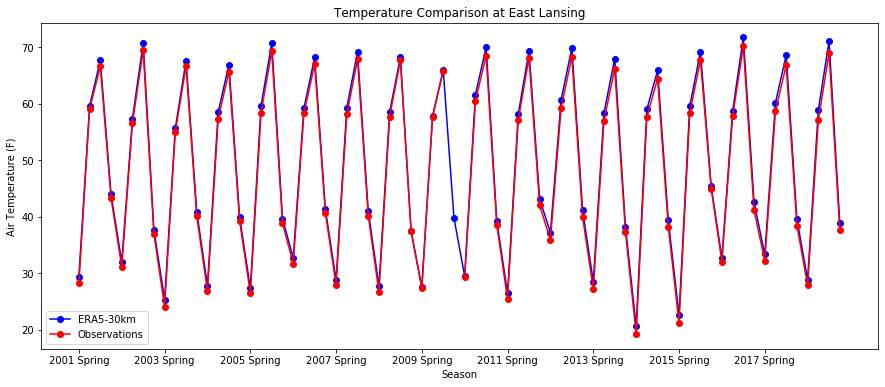

In [97]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,73)), era_temp_season, 'b-o')
plt.plot(list(range(1,73)), obs_temp_season, 'r-o')
plt.xticks(np.arange(1, 72, step=8),['{0} Spring'.format(2*i+2001) for i in range(18)])
plt.xlabel('Season')
plt.ylabel('Air Temperature (F)')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('Temperature Comparison at East Lansing')
plt.savefig('./plot/ERA5-30km-temp_season.png')

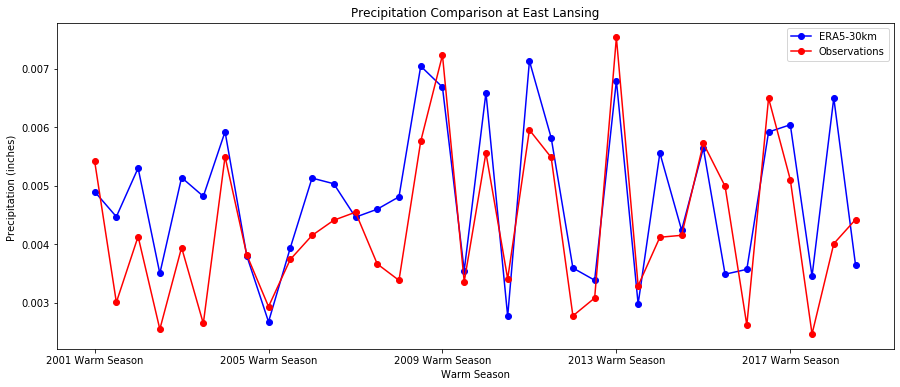

In [98]:
era_prcp_warm = []
i = 1
while i<len(era_prcp_season):
    era_prcp_warm.append(era_prcp_season[i])
    era_prcp_warm.append(era_prcp_season[i+1])
    i = i + 4
era_prcp_warm = np.array(era_prcp_warm)  

obs_prcp_warm = []
i = 1
while i<len(obs_prcp_season):
    obs_prcp_warm.append(obs_prcp_season[i])
    obs_prcp_warm.append(obs_prcp_season[i+1])
    i = i + 4
obs_prcp_warm = np.array(obs_prcp_warm) 

plt.figure(figsize=(15,6))
plt.plot(list(range(1,37)), era_prcp_warm, 'b-o')
plt.plot(list(range(1,37)), obs_prcp_warm, 'r-o')
plt.xticks(np.arange(1, 37, step=8),['{0} Warm Season'.format(4*i+2001) for i in range(18)])
plt.xlabel('Warm Season')
plt.ylabel('Precipitation (inches) ')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('Precipitation Comparison at East Lansing')
plt.savefig('./plot/ERA5-30km-prcp_warmseason.png')

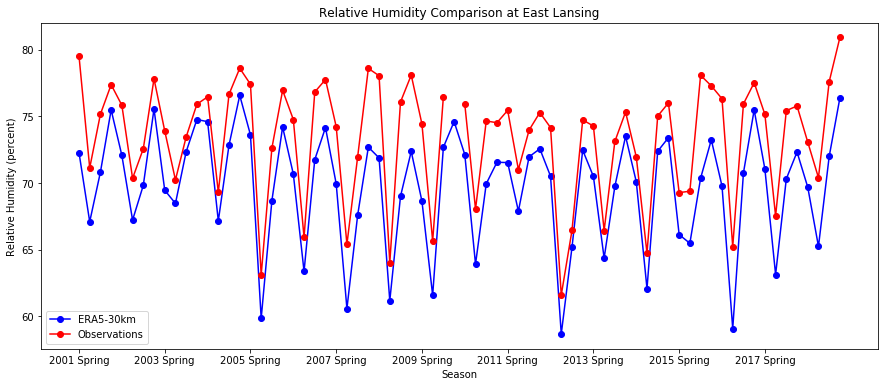

In [99]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,73)), era_rh_season, 'b-o')
plt.plot(list(range(1,73)), obs_rh_season, 'r-o')
plt.xticks(np.arange(1, 72, step=8),['{0} Spring'.format(2*i+2001) for i in range(18)])
plt.xlabel('Season')
plt.ylabel('Relative Humidity (percent)')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('Relative Humidity Comparison at East Lansing')
plt.savefig('./plot/ERA5-30km-rh_season.png')

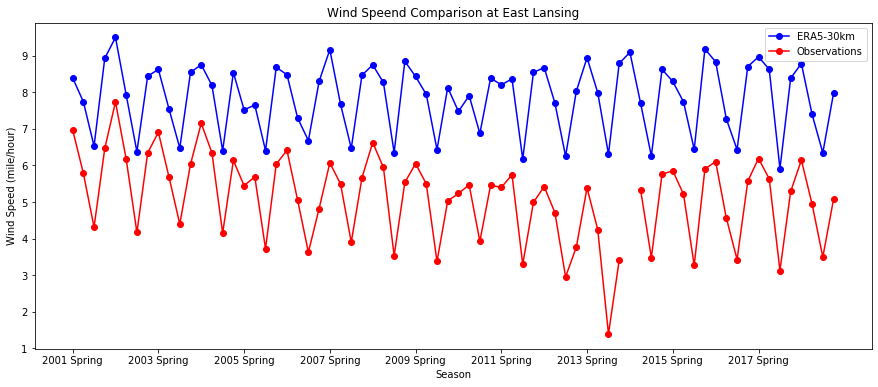

In [100]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,73)), era_wind_season, 'b-o')
plt.plot(list(range(1,73)), obs_wind_season, 'r-o')
plt.xticks(np.arange(1, 72, step=8),['{0} Spring'.format(2*i+2001) for i in range(18)])
plt.xlabel('Season')
plt.ylabel('Wind Speed (mile/hour)')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('Wind Speend Comparison at East Lansing')
plt.savefig('./plot/ERA5-30km-wind_season.png')

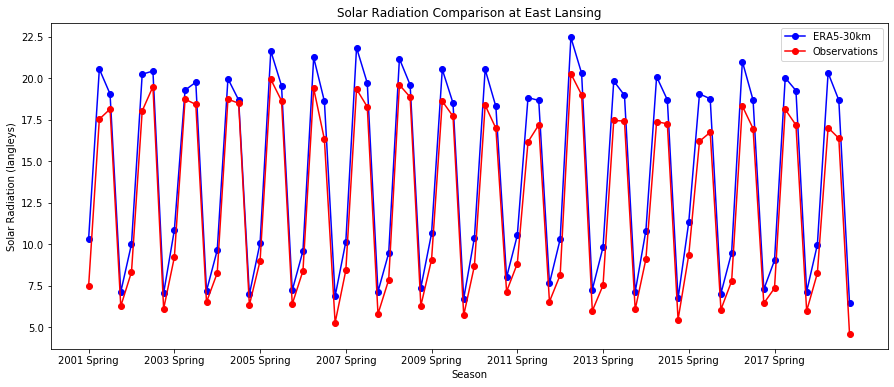

In [101]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,73)), era_solar_season, 'b-o')
plt.plot(list(range(1,73)), obs_solar_season, 'r-o')
plt.xticks(np.arange(1, 72, step=8),['{0} Spring'.format(2*i+2001) for i in range(18)])
plt.xlabel('Season')
plt.ylabel('Solar Radiation (langleys)')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('Solar Radiation Comparison at East Lansing')
plt.savefig('./plot/ERA5-30km-solar_season.png')